<a href="https://colab.research.google.com/github/jiruneko/3Dpeg/blob/master/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
df = pd.read_csv("ecommerce.csv")
print(df.shape)
df.head()

(51290, 21)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51290 non-null  object 
 1   Order Date        51289 non-null  object 
 2   Ship Date         51290 non-null  object 
 3   Aging             51289 non-null  float64
 4   Ship Mode         51290 non-null  object 
 5   Product Category  51290 non-null  object 
 6   Product           51290 non-null  object 
 7   Sales             51290 non-null  object 
 8   Quantity          51289 non-null  object 
 9   Discount          51290 non-null  object 
 10  Profit            51290 non-null  object 
 11  Shipping Cost     51290 non-null  object 
 12  Order Priority    51288 non-null  object 
 13  Customer ID       51289 non-null  object 
 14  Customer Name     51290 non-null  object 
 15  Segment           51289 non-null  object 
 16  City              51290 non-null  object

In [4]:
df.isnull().sum()

Order ID            0
Order Date          1
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

In [5]:
from pandas.api.types import infer_dtype
df.apply(infer_dtype)

Order ID                   string
Order Date                 string
Ship Date                  string
Aging                    floating
Ship Mode                  string
Product Category           string
Product                    string
Sales                      string
Quantity            mixed-integer
Discount                    mixed
Profit                     string
Shipping Cost              string
Order Priority             string
Customer ID                string
Customer Name              string
Segment                    string
City                       string
State                      string
Country                    string
Region                     string
Months                     string
dtype: object

In [6]:
df['Sales'] = df['Sales'].str.replace("$", "")
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

<ipython-input-6-b7c5582b6f8f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sales'] = df['Sales'].str.replace("$", "")


In [7]:
df['Profit'] = df['Profit'].str.replace("$", "")
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

df['Shipping Cost'] = df['Shipping Cost'].str.replace("$", "")
df['Shipping Cost'] = pd.to_numeric(df['Shipping Cost'], errors='coerce')

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

<ipython-input-7-0c3c95749976>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Profit'] = df['Profit'].str.replace("$", "")
<ipython-input-7-0c3c95749976>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Shipping Cost'] = df['Shipping Cost'].str.replace("$", "")


In [8]:
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,140.0,2.0,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,211.0,3.0,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,117.0,5.0,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,118.0,2.0,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,250.0,1.0,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Aging'] = df['Aging'].fillna((df['Ship Date'] - df['Order Date']).dt.days).astype(int)

In [10]:
df['Order Priority'].value_counts()

Medium      29433
High        15499
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [11]:
df['Order Priority'] = df['Order Priority'].fillna('Medium')

In [12]:
df['Segment'] = df['Segment'].fillna('Consumer')

In [13]:
Region_null = df.loc[df['Region'].isnull()]
Region_null

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,140.0,1.0,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug


In [14]:
italy = df.loc[df['Country'] == 'Italy']
italy

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,140.0,1.0,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
142,AU-2015-143,2015-03-23,2015-03-26,3,First Class,Auto & Accessories,Car Seat Covers,114.0,4.0,0.05,...,1.1,Critical,EY-00143,Robertson Coakley,Consumer,Barletta,Apulia,Italy,South,Mar
204,AU-2015-205,2015-04-06,2015-04-16,10,First Class,Auto & Accessories,Car Mat,54.0,2.0,0.04,...,2.7,Critical,RF-00205,Mejia Waldorf,Corporate,Pozzuoli,Campania,Italy,South,Apr
221,AU-2015-222,2015-05-06,2015-05-07,1,First Class,Auto & Accessories,Bike Tyres,72.0,3.0,0.02,...,2.4,Medium,LD-00222,Obrien Geld,Corporate,Prato,Tuscany,Italy,South,May
238,AU-2015-239,2015-07-17,2015-07-21,4,First Class,Auto & Accessories,Tyre,250.0,4.0,0.01,...,16.0,Medium,ON-00239,Frost Tron,Consumer,Bologna,Emilia-Romagna,Italy,South,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49486,FA-2015-28972,2015-10-02,2015-10-12,10,Standard Class,Fashion,Fossil Watch,159.0,2.0,0.01,...,7.6,Medium,LL-0039178,Walls Sumrall,Consumer,Bologna,Emilia-Romagna,Italy,South,Oct
49685,FA-2015-29171,2015-09-28,2015-10-04,6,Standard Class,Fashion,T - Shirts,248.0,2.0,0.02,...,15.8,Medium,KY-0039377,Cantu Zandusky,Corporate,Acireale,Sicily,Italy,South,Sep
49757,FA-2015-29243,2015-01-28,2015-02-02,5,Standard Class,Fashion,Running Shoes,224.0,5.0,0.01,...,13.3,Medium,BY-0039449,Bailey Bixby,Consumer,Novara,Piedmont,Italy,South,Jan
49831,FA-2015-29317,2015-10-26,2015-11-05,10,Standard Class,Fashion,Suits,109.0,4.0,0.02,...,2.0,Medium,NS-0039523,Vega Hopkins,Corporate,Viterbo,Lazio,Italy,South,Oct


In [15]:
df['Region'] = df['Region'].fillna('South')

In [16]:
df = df.drop(df[['Order ID','Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Months']], axis=1)
df.head()

,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Segment,City,State,Country,Region
0,8,First Class,Auto & Accessories,Car Media Players,140.0,2.0,0.05,46.0,4.6,Medium,Consumer,Brisbane,Queensland,Australia,Oceania
1,2,First Class,Auto & Accessories,Car Speakers,211.0,3.0,0.03,112.0,11.2,Medium,Home Office,Berlin,Berlin,Germany,Central
2,8,First Class,Auto & Accessories,Car Body Covers,117.0,5.0,0.01,31.2,3.1,Critical,Consumer,Porirua,Wellington,New Zealand,Oceania
3,7,First Class,Auto & Accessories,Car & Bike Care,118.0,2.0,0.05,26.2,2.6,High,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,9,First Class,Auto & Accessories,Tyre,250.0,1.0,0.04,160.0,16.0,Critical,Corporate,Townsville,Queensland,Australia,Oceania


In [17]:
print("before: {}".format(df.shape))
df = df.dropna()
print("after: {}".format(df.shape))

before: (51290, 15)
after: (51285, 15)


In [18]:
df.isnull().sum()

Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Segment             0
City                0
State               0
Country             0
Region              0
dtype: int64

In [19]:
# Ship Mode
df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7499
Same Day           2701
45788                 1
Name: Ship Mode, dtype: int64

In [20]:
# エラーの行を取り除く
df = df[df['Ship Mode'] != '45788']
df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7499
Same Day           2701
Name: Ship Mode, dtype: int64

In [21]:
df[['Ship Mode', 'Profit']].groupby(['Ship Mode'], as_index=False).mean().sort_values(by='Profit', ascending=False)

,Ship Mode,Profit
3,Standard Class,80.713410
0,First Class,64.516669
1,Same Day,64.491151
2,Second Class,57.000126


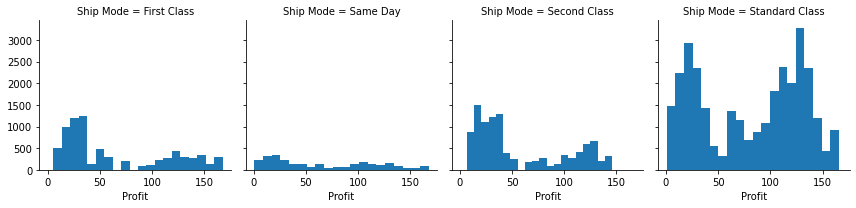

In [22]:
g = sns.FacetGrid(df, col='Ship Mode')
g.map(plt.hist, 'Profit', bins=20)

In [23]:
# Product Category
df['Product Category'].value_counts()

Fashion               30775
Home & Furniture      10309
Auto & Accessories     7499
Electronic             2701
Name: Product Category, dtype: int64

In [24]:
df[['Product Category', 'Profit']].groupby(['Product Category'], as_index=False).mean().sort_values(by='Profit', ascending=False)

,Product Category,Profit
2,Fashion,80.713410
0,Auto & Accessories,64.516669
1,Electronic,64.491151
3,Home & Furniture,57.000126


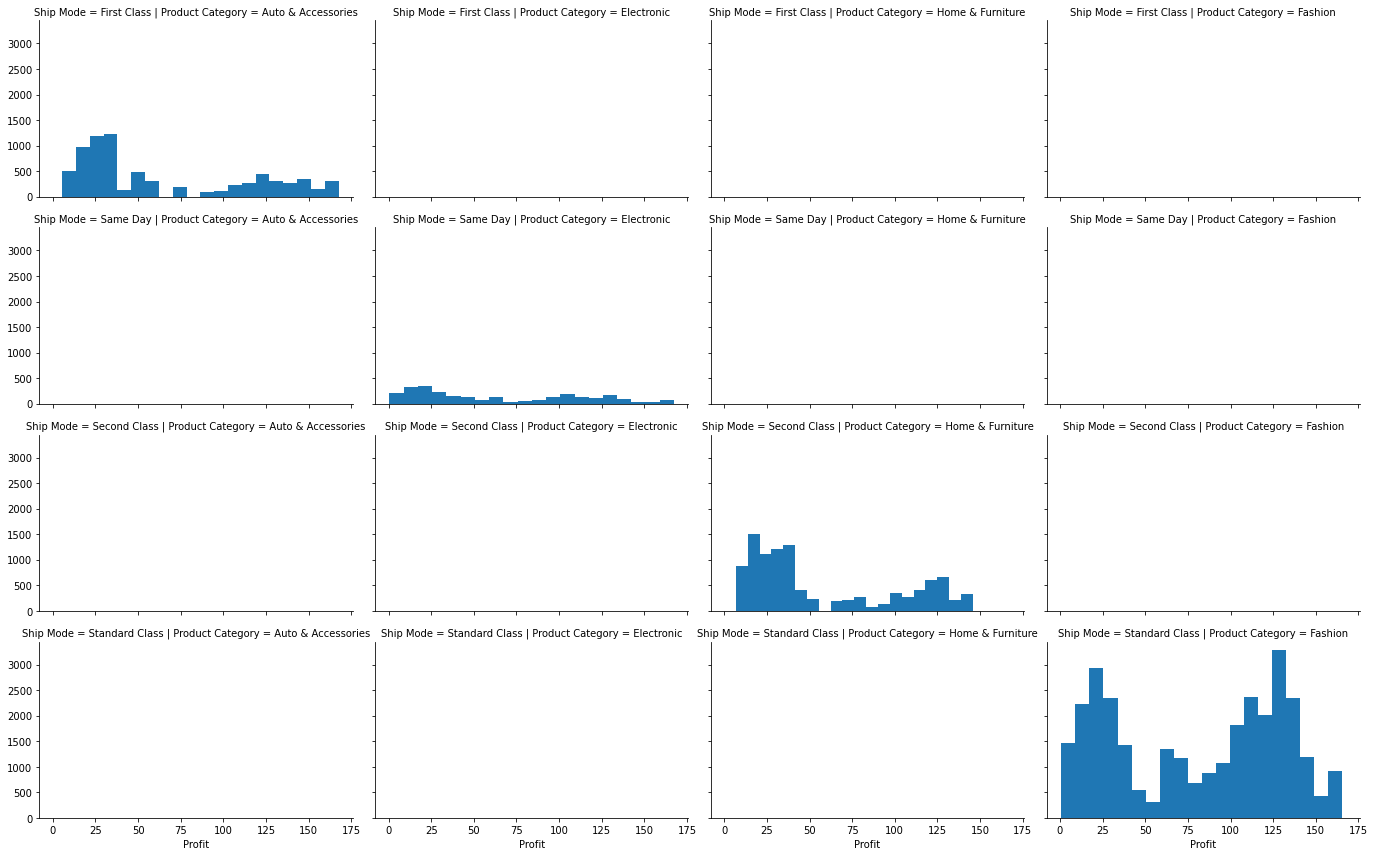

In [25]:
g = sns.FacetGrid(df, row='Ship Mode', col='Product Category', aspect=1.6)
g.map(plt.hist, 'Profit', bins=20)

In [26]:
df = df.drop(['Product Category'], axis=1)

In [27]:
# Product
df['Product'].value_counts()

Sports Wear               2827
Fossil Watch              2796
Titak watch               2795
Sneakers                  2795
Formal Shoes              2795
Running Shoes             2795
Casula Shoes              2795
Suits                     2795
T - Shirts                2794
Shirts                    2794
Jeans                     2794
Dinner Crockery           1053
Umbrellas                 1029
Shoe Rack                 1029
Dinning Tables            1029
Beds                      1029
Sofas                     1029
Bed Sheets                1028
Towels                    1028
Curtains                  1028
Sofa Covers               1027
Tyre                       891
Car Pillow & Neck Rest     829
Car Media Players          826
Car Body Covers            826
Car & Bike Care            826
Car Seat Covers            826
Bike Tyres                 825
Car Mat                    825
Car Speakers               825
Speakers                   261
Mixer/Juicer               224
LED     

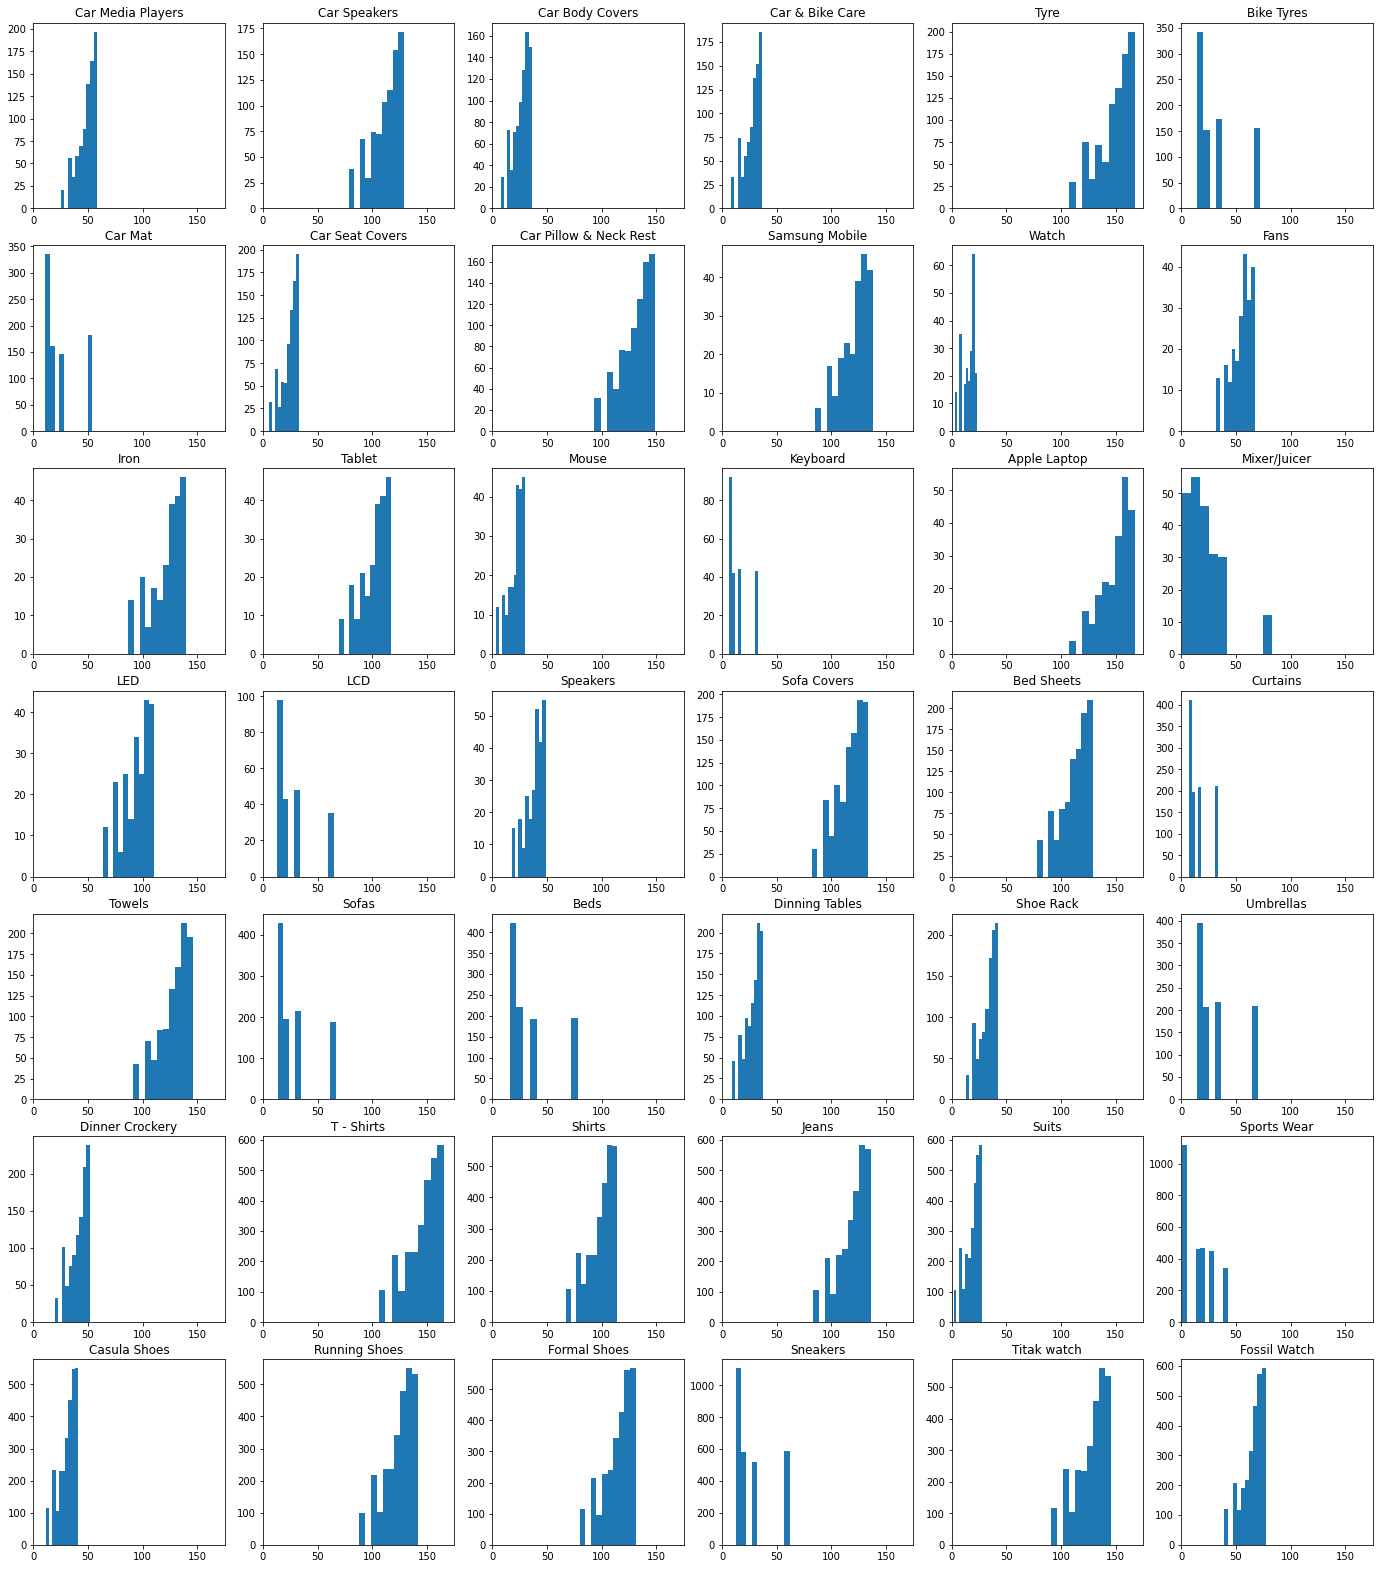

In [28]:
fig = plt.figure(figsize=(24, 28))
products = df['Product'].unique()
for i, p in enumerate(products):
    df_tmp = df.loc[df['Product']==p]
    plt.subplot(7, 6, i + 1)
    plt.hist(df_tmp['Profit'], bins=10)
    plt.xlim(0, 175)
    plt.title(p)

In [29]:
# Ship Modeをラベルエンコーディング
shipMode_label = {'Second Class': 0, 'Same Day': 1, 'First Class': 2, 'Standard Class': 3}
df['Ship Mode'] = df['Ship Mode'].map(shipMode_label)
df.head()

,Aging,Ship Mode,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Segment,City,State,Country,Region
0,8,2,Car Media Players,140.0,2.0,0.05,46.0,4.6,Medium,Consumer,Brisbane,Queensland,Australia,Oceania
1,2,2,Car Speakers,211.0,3.0,0.03,112.0,11.2,Medium,Home Office,Berlin,Berlin,Germany,Central
2,8,2,Car Body Covers,117.0,5.0,0.01,31.2,3.1,Critical,Consumer,Porirua,Wellington,New Zealand,Oceania
3,7,2,Car & Bike Care,118.0,2.0,0.05,26.2,2.6,High,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,9,2,Tyre,250.0,1.0,0.04,160.0,16.0,Critical,Corporate,Townsville,Queensland,Australia,Oceania


In [30]:
products_list = list(products)
products_label = list(range(len(products)))
products_convert = dict(zip(products_list, products_label))
df['Product'] = df['Product'].map(products_convert)

In [31]:
# Order Priority
df['Order Priority'].value_counts()

Medium      29433
High        15499
Critical     3928
Low          2424
Name: Order Priority, dtype: int64

In [32]:
# Segment
df['Segment'].value_counts()

Consumer       26515
Corporate      15427
Home Office     9342
Name: Segment, dtype: int64

In [33]:
# Order Priorityをラベルエンコーディング
orderPriority_label = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
df['Order Priority'] = df['Order Priority'].map(orderPriority_label)

# Segmentをラベルエンコーディング
segment_label = {'Home Office': 0, 'Corporate': 1, 'Consumer': 2}
df['Segment'] = df['Segment'].map(segment_label)

In [34]:
# City
df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Santo Domingo      443
                  ... 
Quevedo              1
Stolberg             1
Roermond             1
Lázaro Cárdenas      1
Felahiye             1
Name: City, Length: 3636, dtype: int64

In [35]:
# 登場回数5回未満のCityをRare_cityでくくる
city_counts = df['City'].value_counts()
rare_cities = city_counts[city_counts<5].index
df['City'] = df['City'].replace(rare_cities, "Rare city")

In [36]:
df['City'].value_counts()

Rare city                3548
New York City             915
Los Angeles               747
Philadelphia              537
San Francisco             510
                         ... 
Sarkand                     5
San Luis Río Colorado       5
Shagamu                     5
Xianning                    5
Wallasey                    5
Name: City, Length: 2087, dtype: int64

In [37]:
cities = df['City'].unique()
cities_list = list(cities)
cities_categories = list(range(len(cities)))
cities_convert = dict(zip(cities_list, cities_categories))

df['City'] = df['City'].map(cities_convert)
df.head()

,Aging,Ship Mode,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Segment,City,State,Country,Region
0,8,2,0,140.0,2.0,0.05,46.0,4.6,1,2,0,Queensland,Australia,Oceania
1,2,2,1,211.0,3.0,0.03,112.0,11.2,1,0,1,Berlin,Germany,Central
2,8,2,2,117.0,5.0,0.01,31.2,3.1,3,2,2,Wellington,New Zealand,Oceania
3,7,2,3,118.0,2.0,0.05,26.2,2.6,2,1,3,Kabul,Afghanistan,Central Asia
4,9,2,4,250.0,1.0,0.04,160.0,16.0,3,1,4,Queensland,Australia,Oceania


In [38]:
# Stateのラベルエンコーディング
state_counts = df['State'].value_counts()
rare_states = state_counts[state_counts<5].index
df['State'] = df['State'].replace(rare_states, "Rare state")

states = df['State'].unique()
states_list = list(states)
states_categories = list(range(len(states)))
states_convert = dict(zip(states_list, states_categories))

df['State'] = df['State'].map(states_convert)

# Countryのラベルエンコーディング
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts<5].index
df['Country'] = df['Country'].replace(rare_countries, "Rare country")

countries = list(df['Country'].unique())
countries_label = list(range(len(countries)))
countries_convert = dict(zip(countries, countries_label))

df['Country'] = df['Country'].map(countries_convert)

df.head()

,Aging,Ship Mode,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Segment,City,State,Country,Region
0,8,2,0,140.0,2.0,0.05,46.0,4.6,1,2,0,0,0,Oceania
1,2,2,1,211.0,3.0,0.03,112.0,11.2,1,0,1,1,1,Central
2,8,2,2,117.0,5.0,0.01,31.2,3.1,3,2,2,2,2,Oceania
3,7,2,3,118.0,2.0,0.05,26.2,2.6,2,1,3,3,3,Central Asia
4,9,2,4,250.0,1.0,0.04,160.0,16.0,3,1,4,0,0,Oceania


In [39]:
# Region
df['Region'].value_counts()

Central           11116
South              6643
EMEA               5029
North              4784
Africa             4586
Oceania            3487
West               3203
Southeast Asia     3128
East               2848
North Asia         2336
Central Asia       2048
Caribbean          1690
Canada              384
So3th                 1
4orth                 1
Name: Region, dtype: int64

In [40]:
# So3th → South, 4orth → North
df = df.replace({'So3th': 'South', '4orth': 'North'})
df['Region'].value_counts()

Central           11116
South              6644
EMEA               5029
North              4785
Africa             4586
Oceania            3487
West               3203
Southeast Asia     3128
East               2848
North Asia         2336
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [41]:
# Regionをラベルエンコーディング
regions = list(df['Region'].unique())
regions_label = list(range(len(regions)))
regions_convert = dict(zip(regions, regions_label))

df['Region'] = df['Region'].map(regions_convert)
df.head()

,Aging,Ship Mode,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Segment,City,State,Country,Region
0,8,2,0,140.0,2.0,0.05,46.0,4.6,1,2,0,0,0,0
1,2,2,1,211.0,3.0,0.03,112.0,11.2,1,0,1,1,1,1
2,8,2,2,117.0,5.0,0.01,31.2,3.1,3,2,2,2,2,0
3,7,2,3,118.0,2.0,0.05,26.2,2.6,2,1,3,3,3,2
4,9,2,4,250.0,1.0,0.04,160.0,16.0,3,1,4,0,0,0


In [42]:
x = df.drop(df[['Sales', 'Profit']], axis=1)
sales = df['Sales']
profit = df['Profit']
x.head()

,Aging,Ship Mode,Product,Quantity,Discount,Shipping Cost,Order Priority,Segment,City,State,Country,Region
0,8,2,0,2.0,0.05,4.6,1,2,0,0,0,0
1,2,2,1,3.0,0.03,11.2,1,0,1,1,1,1
2,8,2,2,5.0,0.01,3.1,3,2,2,2,2,0
3,7,2,3,2.0,0.05,2.6,2,1,3,3,3,2
4,9,2,4,1.0,0.04,16.0,3,1,4,0,0,0


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, profit, test_size=0.2, random_state=0)

In [44]:
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [45]:
# 線形回帰
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

# 誤差の算出
r2_lr = r2_score(y_test, lr_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
mae_lr = mean_absolute_error(y_test, lr_pred)

lr_result = np.array(['Linear Regression', r2_lr, rmse_lr, mae_lr])
lr_result

array(['Linear Regression', '0.9999638407142085', '0.2955742527929384',
       '0.2515926962390046'], dtype='<U32')

In [46]:
# サポートベクター回帰
svr = svm.SVR(kernel='rbf', C=1, epsilon=0.1, gamma='auto')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

# 誤差の算出
r2_svr = r2_score(y_test, svr_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_pred))
mae_svr = mean_absolute_error(y_test, svr_pred)

svr_result = np.array(['SVR', r2_svr, rmse_svr, mae_svr])
svr_result

array(['SVR', '0.08404263177268001', '47.042924091171926',
       '42.189342703248755'], dtype='<U32')

In [47]:
# 決定木
tree = tree.DecisionTreeRegressor(max_depth=3)
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

# 誤差の算出
r2_tree = r2_score(y_test, tree_pred)
rmse_tree = np.sqrt(mean_squared_error(y_test, tree_pred))
mae_tree = mean_absolute_error(y_test, tree_pred)

tree_result = np.array(['Decision Tree', r2_tree, rmse_tree, mae_tree])
tree_result

array(['Decision Tree', '0.9857678442955701', '5.863973806003623',
       '4.95438615720434'], dtype='<U32')

In [48]:
# Random Forest
rf = ensemble.RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# 誤差の算出
r2_rf = r2_score(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mae_rf = mean_absolute_error(y_test, rf_pred)

rf_result = np.array(['Random Forest', r2_rf, rmse_rf, mae_rf])
rf_result

array(['Random Forest', '0.9999999738569955', '0.007947571206126125',
       '0.0004894218583334415'], dtype='<U32')

In [49]:
results = pd.DataFrame([lr_result, svr_result, tree_result, rf_result], columns=['Model', 'R^2', 'RMSE', 'MAE'])
results

,Model,R^2,RMSE,MAE
0,Linear Regression,0.9999638407142085,0.2955742527929384,0.2515926962390046
1,SVR,0.08404263177268001,47.042924091171926,42.189342703248755
2,Decision Tree,0.9857678442955701,5.863973806003623,4.95438615720434
3,Random Forest,0.9999999738569955,0.007947571206126125,0.0004894218583334415
